In [1]:
import collections
import copy

def ld():
    return [int(x) for x in open("17.txt").read().split(',')]


class m:
    idgen=0
    
    #get op and modes of following 3 addresses
    def ix(s,x):
        assert(x>=0)
        x="%05d"%(x)
        op=int(x[3:])
        m3,m2,m1=[int(c) for c in x[:3]]
        return op,m1,m2,m3


    def gv(s,p,ip,m,ix):
        assert(ix in [1,2,3])
        if m==0:#reg
            return p[p[ip+ix]]
        elif m==1:#imm
            return p[ip+ix] 
        elif m==2:#reg+rb
            return p[p[ip+ix]+s.rb]
        assert(0)
        
            
        

    
    def __init__(s,p):
        #load to mem
        s.p=collections.defaultdict(int)
        for i,v in enumerate(p):
            s.p[i]=v
            
        #possible data source
        s.supplier=None
        
        #input queue
        s.i=[]
        
        #id
        s.id=m.idgen
        m.idgen+=1
        
        #iterator for execution
        #s.it=s.iterator()
        s.ip=0
        
        #print("M",s.id,"created")
        
        #relative base
        s.rb=0
        
    
    def sendInput(s, i):
        s.i.append(i)
        
    
    def getData(s):
        ip=s.ip
        
        while 1:
            op,m1,m2,m3=s.ix(s.p[ip])
            
            if op==1:#add
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)+s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==2:#mul
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)*s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==3:#in
                assert(m1 in [0,2])
                r=None
                if len(s.i)>0:
                    r=s.i[0]
                    s.i=s.i[1:]
                else:
                    if s.supplier:
                        r=s.supplier.getData()
                    else:
                        print("id",s.id, "returning zero")
                        #assert(0)
                        r=0
                tix=s.p[ip+1]
                if m1==2:
                    tix+=s.rb
                s.p[tix]=r
                ip+=2
            elif op==4:#out
                
                r=s.gv(s.p,ip,m1,1)
                #print(s.id,"spits out",r)
                s.ip=ip+2
                return r
                #print("--id:",s.id,"onwards")
                
                
            elif op==5:#jump-if-true
                if s.gv(s.p,ip,m1,1):
                    ip=s.gv(s.p,ip,m2,2)
                else:
                    ip+=3
            elif op==6:#jump-if-false
                if not s.gv(s.p,ip,m1,1):
                    ip=s.gv(s.p,ip,m2,2)
                else:
                    ip+=3
            elif op==7:#less-than
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)<s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==8:#equals
                assert(m3 in [0,2])
                tix=s.p[ip+3]
                if m3==2:
                    tix+=s.rb
                s.p[tix]=s.gv(s.p,ip,m1,1)==s.gv(s.p,ip,m2,2)
                ip+=4
            elif op==9:#adjust relative base
                s.rb+=s.gv(s.p,ip,m1,1)
                ip+=2
            elif op in [99]:#end
                #print("fin", s.id)
                break
            else:
                print("id", s.id, "op",op,"c",c)
                assert(0)
            #print(op)
            
        
        return -1
    
#ld()    
    
    
    

In [2]:
from PIL import Image
from IPython import display
import numpy as np
import cv2
import random

def dims(M):
    X=[]
    Y=[]
    for x,y in M.keys():
        X.append(x)
        Y.append(y)
    return max(X)+1,max(Y)+1

def pretty(M):
    w,h=dims(M)
    #print(w,h)

    i=np.zeros([h,w,3]).astype(np.uint8)
    for x,y in M.keys():
        v=M[(x,y)]
        if v=='.':
            i[y,x,:]=[0,0,0]
        elif v=='#':
            #i[y,x,:]=[100+int(random.random()*155),0,0]
            c=(x+y)%2
            i[y,x,:]=[[100,100,100],[255,255,255]][c]
        elif v=='<':
            i[y,x,:]=[100,0,0]
        elif v=='>':
            i[y,x,:]=[100,255,0]
        elif v=='v':
            i[y,x,:]=[100,0,255]
        elif v=='^':
            i[y,x,:]=[100,255,255]
        elif v=='X':
            i[y,x,:]=[0,255,0]
        else:
            i[y,x,:]=[255,0,255]
    F=8
    i = cv2.resize(i, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    #display.clear_output(wait=True)
    display.display(Image.fromarray(i))

    

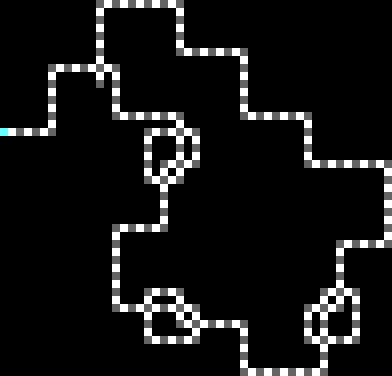

part1: 8520 8520


In [3]:
def o2m(o):
    o=[chr(x) for x in o]
    o="".join(o)
    o=o.split("\n")
    M={}
     
    
    for y,l in enumerate(o):
        #print(l)
        for x,v in enumerate(l):
            if v!='.':
                M[(x,y)]=v
    
    return M

def m2a(M):
    w,h=dims(M)
    for y in range(h):
        l=""
        for x in range(w):
            if (x,y) in M:
                l+=M[(x,y)]
            else:
                l+=" "
        print(l)

def walk(M,x,y,dx,dy):
    a=0
    w,h=dims(M)
    while 1:
        x+=dx
        y+=dy
        if not (x,y) in M or M[(x,y)]!='#':
            break
        a+=1
    assert(a>=0)
    print(a)
    return a
    
        

def ap(M):
    w,h=dims(M)
    acc=0
    for y in range(h):
        for x in range(w):
            g=1
            for p in [(x,y),(x-1,y),(x+1,y),(x,y-1),(x,y+1)]:
                if not p in M or M[p]!='#':
                    g=0
                    
                
            
            if g:
                #print("walk")
                #acc+=walk(M,x,y,-1,0)*walk(M,x,y,0,-1)
                acc+=x*y
    return acc
                

def p1():
    o=[]
    p=ld()
    M=m(p)
    while 1:
        v=M.getData()
        if v==-1:
            break
        o.append(v)
    M=o2m(o)
    #m2a(M)
    pretty(M)
    return ap(M)
    
print("part1:", p1(),8520)




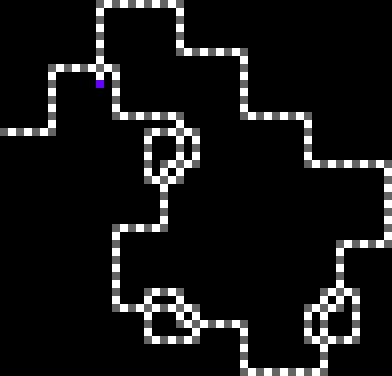

part2: 926819 926819


In [4]:
def p2():
    #--####################
    M="A,A,B,C,B,C,B,C,A,C"
    A="R,6,L,8,R,8"
    B="R,4,R,6,R,6,R,4,R,4"
    C="L,8,R,6,L,10,L,10"
    assert(len(M)<=20)
    #assert(len(A)<=20)
    assert(len(B)<=20)
    #assert(len(C)<=20)
    feed=M+"\n"
    feed+=A+"\n"
    feed+=B+"\n"
    feed+=C+"\n"
    feed+="y\n"
    
    p=ld()
    p[0]=2
    
        
    M=m(p)
    for c in feed:
        M.sendInput(ord(c))
    op=[]
    while 1:
        n=M.getData()
        #print(n)
        op.append(n)
        if n>128:
            return n
        if len(op)>2 and op[-2:]==[ord('\n'),ord('\n')]:
            if op[0]==ord('.'):
                display.clear_output(wait=True)
                pretty(o2m(op))
            else:
                print("".join([chr(x) for x in op[:-2]]))
            
            #print([chr(x) for x in op])
            op=[]

print("part2:", p2(),926819)


